In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from pydae.plot_tools import set_style
import os
colors = set_style(plt)

In [2]:
folder = r'.\data\20241004_open_loop_p'
#folder = r'.\data\20241004_time_250ms_dmw_0_3_p' # PI enabled

file = os.path.join(folder, "data.csv")
data_p = np.genfromtxt(file, delimiter=',', names=True, dtype=None, encoding='utf-8')

# original a 10 ms
Times = (data_p['timestamp']-data_p['timestamp'][0])/1e9 # seconds
p_ref_c = data_p['ppcwaverefp']*1e6 # W
p_ref_d = data_p['ppcpref']*1e6 # W
p_poi = data_p['ppcpoimeasurementp'] # W 


In [3]:
import temp

model = temp.model()
model.ini({}, 'xy_0.json')
model.save_xy_0('xy_1.json')
model.report_x()


delta_2 = -0.00
Domega_2 = -0.00
Dv_2  = -0.00
x_0_pq_1 = -5.94
x_1_pq_1 =  5.94
x_2_pq_1 =  0.00
x_3_pq_1 =  0.00
xi_freq =  0.00


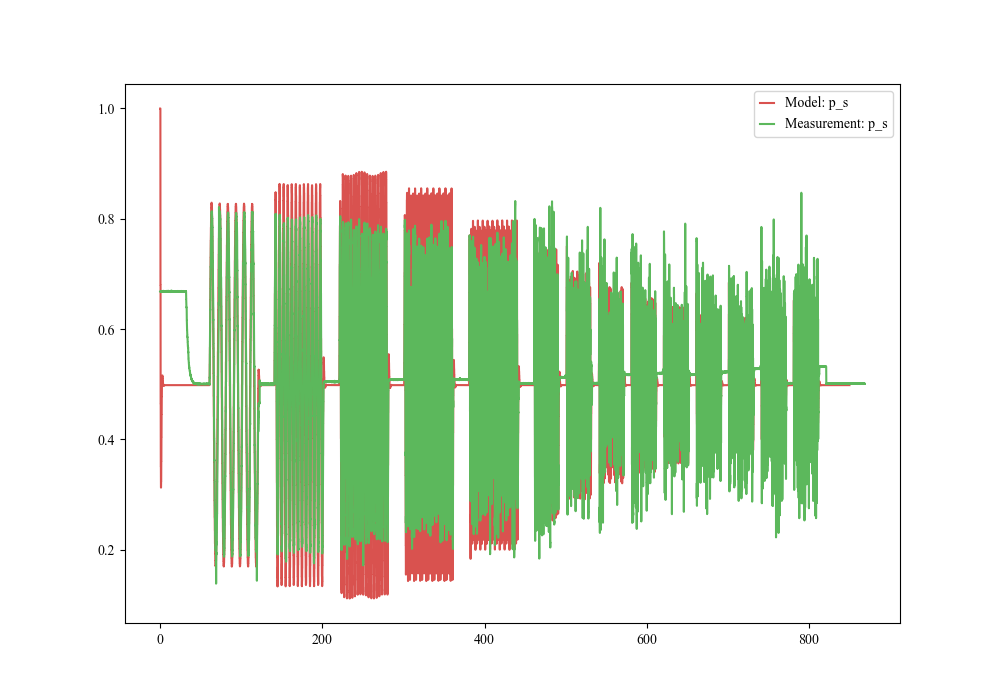

In [7]:
model = temp.model()
model.ini({}, 'xy_1.json')
Dt_mid = 0.25
model.Dt = 0.01
times = np.arange(0,850,0.05)
N_t = len(times)

U_p = np.zeros((N_t,))
Z_plant  = np.zeros((N_t,))
Z_pod    = np.zeros((N_t,))
Z_filter = np.zeros((N_t,))
input = 0.0
input_prev = 0.0
t_mid = 0.0
for it,t in enumerate(times):



    # Referencias
    #input = 0.1*np.sin(2*np.pi*1*t) 
    
    model.run(t,{'p_s_ppc_1':input})
    
    if t > t_mid:
        t_mid = t+Dt_mid
        idx = np.searchsorted(Times,t)
        input =   p_ref_c[idx]/10e6-0.5    

    U_p[it] = input

model.post()
fig,axes = plt.subplots(nrows=1,figsize=(10,7));

#axes.plot(model.Time,model.get_values('p_s_ppc_1'), label = 'p_s_ppc_1')
axes.step(model.Time,model.get_values('p_s_1'), label = 'Model: p_s')
axes.plot(Times, p_poi/10e6-0.5, label = 'Measurement: p_s')
# axes.plot(times,U_p, label = 'p_s_1')

axes.legend()

In [5]:
Times.shape

(86858,)

In [6]:
p_ref_c.shape

(86858,)